In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('/content/drive/MyDrive/Copy of blinkit_data.csv')

In [3]:
df.head(10)

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0
5,low fat,FDS52,Frozen Foods,2020,OUT017,Tier 2,Small,Supermarket Type1,0.005505,8.89,102.4016,5.0
6,Low Fat,NCU05,Health and Hygiene,2011,OUT010,Tier 3,Small,Grocery Store,0.098312,11.80,81.4618,5.0
7,Low Fat,NCD30,Household,2015,OUT045,Tier 2,Small,Supermarket Type1,0.026904,19.70,96.0726,5.0
8,Low Fat,FDW20,Fruits and Vegetables,2000,OUT013,Tier 3,High,Supermarket Type1,0.024129,20.75,124.1730,5.0
9,Low Fat,FDX25,Canned,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.101562,NaN,181.9292,5.0


In [4]:
df.shape

(8523, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item Fat Content           8523 non-null   object 
 1   Item Identifier            8523 non-null   object 
 2   Item Type                  8523 non-null   object 
 3   Outlet Establishment Year  8523 non-null   int64  
 4   Outlet Identifier          8523 non-null   object 
 5   Outlet Location Type       8523 non-null   object 
 6   Outlet Size                8523 non-null   object 
 7   Outlet Type                8523 non-null   object 
 8   Item Visibility            8523 non-null   float64
 9   Item Weight                7060 non-null   float64
 10  Sales                      8523 non-null   float64
 11  Rating                     8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
df.describe()

,Outlet Establishment Year,Item Visibility,Item Weight,Sales,Rating
count,8523.000000,8523.000000,7060.000000,8523.000000,8523.000000
mean,2010.831867,0.066132,12.857645,140.992782,3.965857
std,8.371760,0.051598,4.643456,62.275067,0.605651
min,1998.000000,0.000000,4.555000,31.290000,1.000000
25%,2000.000000,0.026989,8.773750,93.826500,4.000000
50%,2012.000000,0.053931,12.600000,143.012800,4.000000
75%,2017.000000,0.094585,16.850000,185.643700,4.200000
max,2022.000000,0.328391,21.350000,266.888400,5.000000


In [7]:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

In [8]:
df['Item Fat Content'].unique()

array(['Regular', 'Low Fat', 'low fat', 'LF', 'reg'], dtype=object)

In [9]:
df['Item Fat Content'] = df['Item Fat Content'].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'})

In [10]:
df['Item Fat Content'].unique()

array(['Regular', 'Low Fat'], dtype=object)

In [11]:
total_sales = df['Sales'].sum()

avg_sales = df['Sales'].mean()

no_of_items_sold = df['Sales'].count()

avg_rating = df['Rating'].mean()

print(f'Total Sales: {total_sales:.0f}$')
print(f'Average Sales: {avg_sales:.0f}')
print(f'Number of Items Sold: {no_of_items_sold}')
print(f'Average Rating: {avg_rating:.0f}')

Total Sales: 1201681$
Average Sales: 141
Number of Items Sold: 8523
Average Rating: 4


In [12]:
sales_by_fatcontent = df.groupby('Item Fat Content')['Sales'].sum()
sales_by_fatcontent

,Sales
Item Fat Content,
Low Fat,776319.6784
Regular,425361.8024


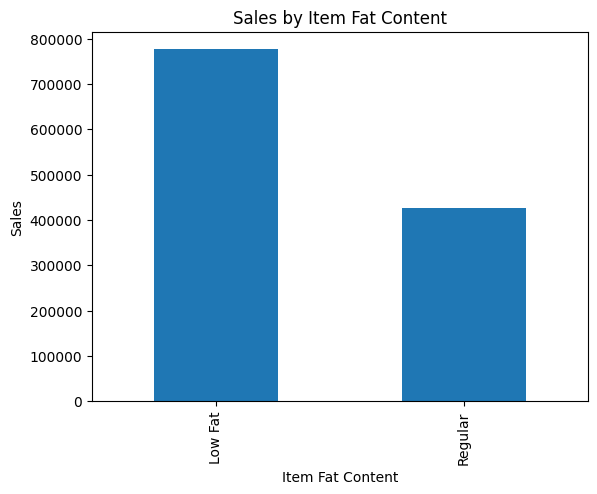

In [13]:
sales_by_fatcontent.plot(kind='bar')
plt.title('Sales by Item Fat Content')
plt.xlabel('Item Fat Content')
plt.ylabel('Sales')
plt.show()

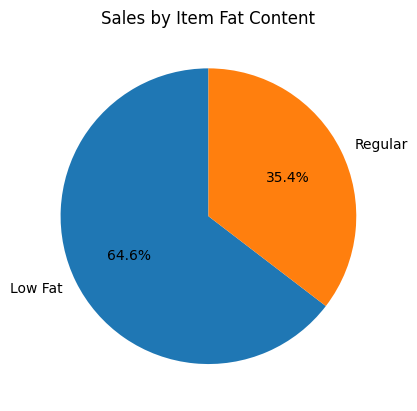

In [14]:
sales_by_fatcontent.plot(kind='pie',autopct= '%.1f%%',startangle = 90)
plt.title('Sales by Item Fat Content')
plt.ylabel('')
plt.show()

In [15]:
sales_by_item_type = df.groupby('Item Type')['Sales'].sum().sort_values(ascending=False)
sales_by_item_type

,Sales
Item Type,
Fruits and Vegetables,178124.0810
Snack Foods,175433.9204
Household,135976.5254
Frozen Foods,118558.8814
Dairy,101276.4596
Canned,90706.7270
Baking Goods,81894.7364
Health and Hygiene,68025.8388
Meat,59449.8638


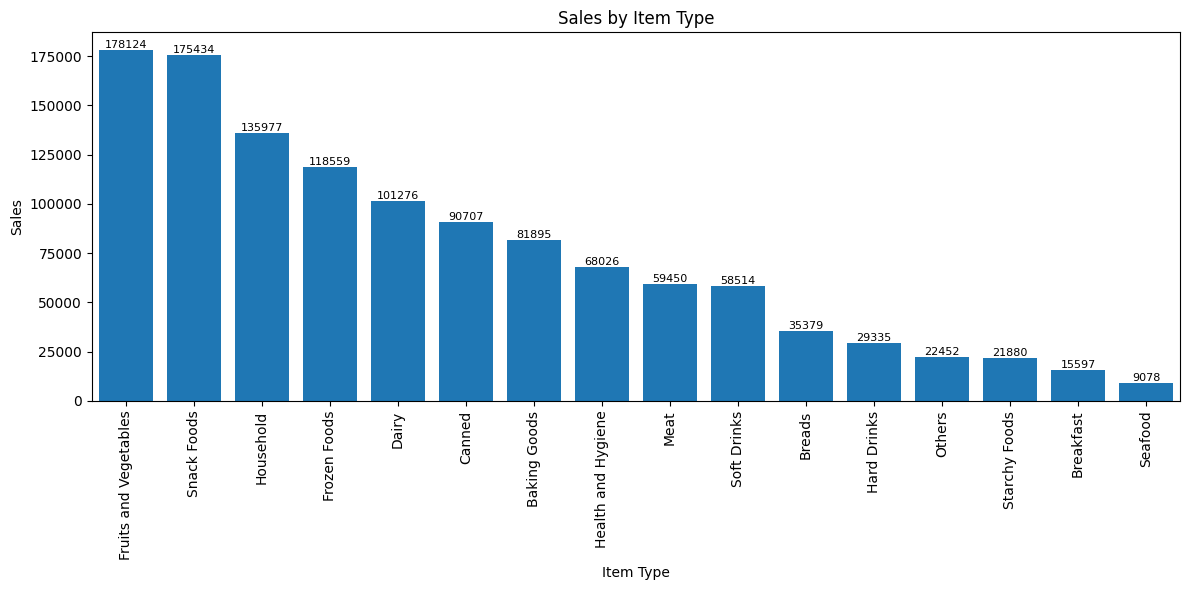

In [16]:
plt.figure(figsize=(12,6))
sales_by_item_type.plot(kind='bar')

plt.title('Sales by Item Type')
plt.xlabel('Item Type')
plt.ylabel('Sales')

bars = plt.bar(sales_by_item_type.index,sales_by_item_type.values)

for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{bar.get_height():.0f}', ha='center', va='bottom',fontsize=8)


plt.tight_layout()

plt.show()

In [21]:
sales_by_outletloc_fatcontent = df.groupby(['Outlet Location Type','Item Fat Content'])['Sales'].sum().unstack().sort_values(by='Low Fat',ascending=False)
sales_by_outletloc_fatcontent

Item Fat Content,Low Fat,Regular
Outlet Location Type,,
Tier 3,306806.9924,165326.0348
Tier 2,254464.7734,138685.8682
Tier 1,215047.9126,121349.8994


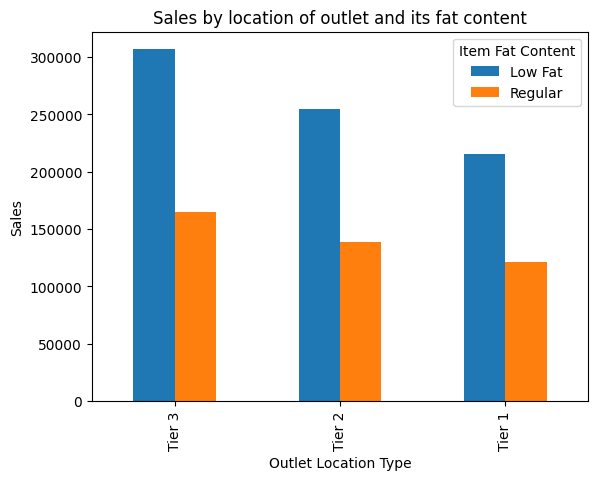

In [22]:
sales_by_outletloc_fatcontent.plot(kind='bar')
plt.title('Sales by location of outlet and its fat content')
plt.xlabel('Outlet Location Type')
plt.ylabel('Sales')
plt.show()

In [31]:
Sales_by_outletestalishment = df.groupby('Outlet Establishment Year')['Sales'].sum()
Sales_by_outletestalishment

,Sales
Outlet Establishment Year,
1998,204522.2570
2000,131809.0156
2010,132113.3698
2011,78131.5646
2012,130476.8598
2015,130942.7782
2017,133103.9070
2020,129103.9564
2022,131477.7724


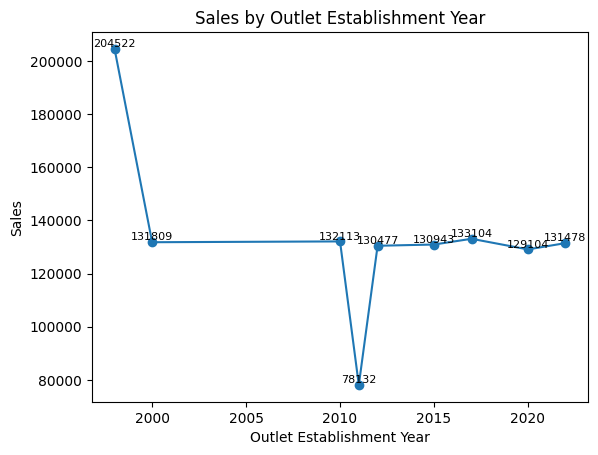

In [38]:
Sales_by_outletestalishment.plot(kind = 'line', marker='o')

for x,y in zip(Sales_by_outletestalishment.index,Sales_by_outletestalishment.values):
    plt.text(x,y,f'{y:.0f}',ha='center',va='bottom',fontsize=8)

plt.title('Sales by Outlet Establishment Year')
plt.xlabel('Outlet Establishment Year')
plt.ylabel('Sales')

plt.show()



In [39]:
Sales_by_outletsize = df.groupby('Outlet Size')['Sales'].sum()
Sales_by_outletsize

,Sales
Outlet Size,
High,248991.5840
Medium,507895.7284
Small,444794.1684


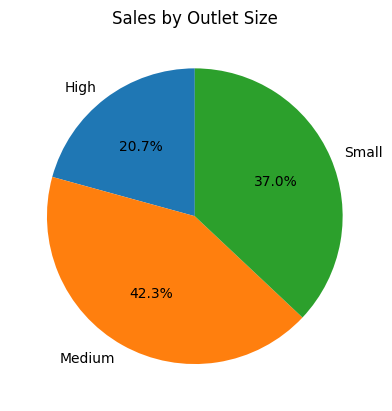

In [40]:
Sales_by_outletsize.plot(kind='pie',autopct='%.1f%%',startangle=90)
plt.title('Sales by Outlet Size')
plt.ylabel('')
plt.show()

In [43]:
Sales_by_location = df.groupby('Outlet Location Type')['Sales'].sum().sort_values(ascending=False)
Sales_by_location

,Sales
Outlet Location Type,
Tier 3,472133.0272
Tier 2,393150.6416
Tier 1,336397.8120


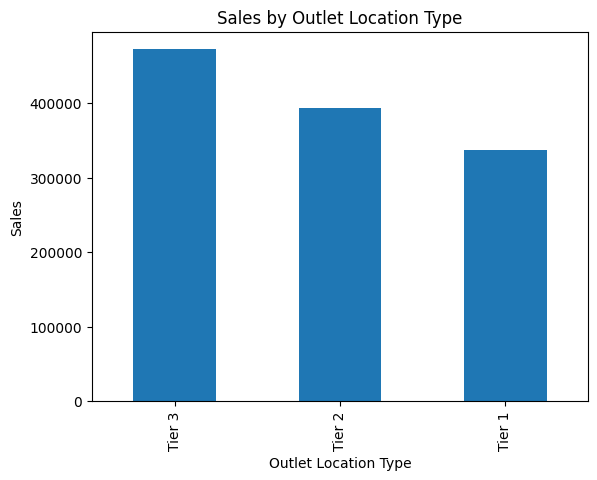

In [44]:
Sales_by_location.plot(kind='bar')
plt.title('Sales by Outlet Location Type')
plt.xlabel('Outlet Location Type')
plt.ylabel('Sales')
plt.show()

Based on the exploratory data analysis business decisions:

Focus on "Low Fat" Items: Items categorized as "Low Fat" are significantly more popular and contribute a larger share to overall sales. Consider promoting and stocking a wider variety of "Low Fat" products to capitalize on this trend.

Prioritize High-Performing Item Types: "Fruits and Vegetables" and "Snack Foods" are top performers. Ensure these categories are well-stocked and strategically placed in outlets. Explore opportunities to expand offerings within these types.

Address Underperforming Item Types: Categories like "Seafood" and "Breakfast" have lower sales. Investigate the reasons behind this and consider strategies to improve their performance, such as targeted promotions or product assortment adjustments.

Leverage Tier 3 Outlets: Outlets in Tier 3 locations demonstrate strong sales across all item types. Focus on optimizing operations and marketing efforts in these locations to maximize profitability.

Analyze Outlet Establishment Year Trends: The outlet established in 1998 stands out with high sales. Analyze the factors contributing to its success and explore if similar strategies can be applied to other outlets. Investigate the reasons for the dip in sales for the outlet established in 2011 to identify areas for improvement.

Optimize Outlet Size Strategies: Medium-sized outlets are the highest contributors to sales. Understand the characteristics of these successful outlets and consider replicating their model where feasible.
Capitalize on Tier 3 and Tier 2 Locations: Tier 3 and Tier 2 locations show higher overall sales. Prioritize these locations for resource allocation and expansion opportunities.